In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("./IRIS.csv")

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

algorithms = ["Random Forest", "KNN", "LogisticRegression"]
cross_validation_scores = []

x = df.drop("species", axis=1)

encoder = LabelEncoder()

y = encoder.fit_transform(df["species"])

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.8)

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

score = cross_val_score(model, x, y).mean()

cross_validation_scores.append(score)

print("cross validation score of RandomForestClassifier ==>", str(score))

cross validation score of RandomForestClassifier ==> 0.96


In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7)

score = cross_val_score(knn_model, x, y).mean()

cross_validation_scores.append(score)

print("cross validation score of K Nearset Neighbors ==>", str(score))

cross validation score of K Nearset Neighbors ==> 0.9800000000000001


In [58]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=200)

score = cross_val_score(lr_model, x, y).mean()

cross_validation_scores.append(score)

print("cross validation score of RandomForestClassifier ==>", str(score))

cross validation score of RandomForestClassifier ==> 0.9733333333333334


the best model for this case is: KNN


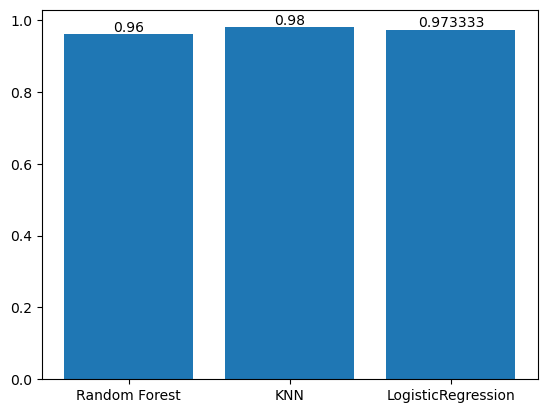

In [59]:
fig, ax = plt.subplots()
bars = ax.bar(algorithms, cross_validation_scores)

for bar in ax.containers:
    ax.bar_label(bars)
    
print("the best model for this case is:", algorithms[cross_validation_scores.index(max(cross_validation_scores))])